In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset='/content/drive/MyDrive/ML/50_Startups.xlsx'
import pandas as pd
df=pd.read_excel(dataset)

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
len(df)

50

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming you have the dataset stored in a DataFrame called 'data'
df=pd.read_excel(dataset)


states=df['State']

# Perform label encoding on the 'State' column
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(states)


print(df)

    R&D Spend  Administration  Marketing Spend  State     Profit
0   165349.20       136897.80        471784.10      2  192261.83
1   162597.70       151377.59        443898.53      0  191792.06
2   153441.51       101145.55        407934.54      1  191050.39
3   144372.41       118671.85        383199.62      2  182901.99
4   142107.34        91391.77        366168.42      1  166187.94
5   131876.90        99814.71        362861.36      2  156991.12
6   134615.46       147198.87        127716.82      0  156122.51
7   130298.13       145530.06        323876.68      1  155752.60
8   120542.52       148718.95        311613.29      2  152211.77
9   123334.88       108679.17        304981.62      0  149759.96
10  101913.08       110594.11        229160.95      1  146121.95
11  100671.96        91790.61        249744.55      0  144259.40
12   93863.75       127320.38        249839.44      1  141585.52
13   91992.39       135495.07        252664.93      0  134307.35
14  119943.24       15654

In [9]:
#splitting the data
import pandas as pd
from sklearn.model_selection import train_test_split

X = df[['R&D Spend', 'Administration', 'Marketing Spend','State']]#Other way- df.drop['Profit',axis=1]
Y = df['Profit']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)


In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [12]:
X_train.shape


(40, 4)

In [13]:
Y_train.shape

(40,)

In [27]:
from sklearn.neighbors import KNeighborsRegressor
knn_clf=KNeighborsRegressor(n_neighbors=2)
knn_clf.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=2)

In [28]:
y_pred=knn_clf.predict(X_test)

In [29]:
knn_clf.score(sc.transform(X),Y)

0.914690431913372

In [19]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#for best k values
neighbors=np.arange(1,7)#array and initialize it with 1,20
overall_accuracy=np.empty(len(neighbors))
training_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn_clf=KNeighborsRegressor(n_neighbors=k)
  knn_clf.fit(X_train,Y_train)

  training_accuracy[i]=knn_clf.score(X_train,Y_train)

  test_accuracy[i]=knn_clf.score(X_test,Y_test)


  #overall accuracy
  overall_accuracy[i]=knn_clf.score(sc.transform(X),Y)

#Generate the graphs


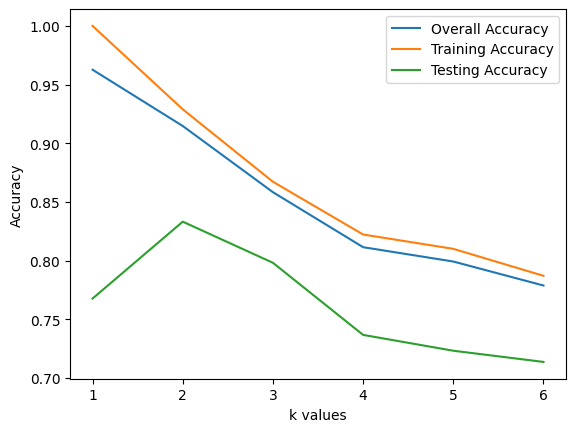

In [20]:
import matplotlib.pyplot as plt
plt.plot(neighbors,overall_accuracy,label="Overall Accuracy")
plt.plot(neighbors,training_accuracy,label="Training Accuracy")
plt.plot(neighbors,test_accuracy,label="Testing Accuracy")
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()